# Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday 7-day low, buy.
    3. If the SPY makes an intraday 7-day high, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()
use_adj = False

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, period)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
142,2019-06-27,2919.66,2019-07-01,2971.41,51.75,207.00,4,3849.53,
143,2019-07-18,2978.87,2019-07-24,3017.80,38.93,155.72,4,4005.25,
144,2019-07-31,2990.71,2019-08-30,2939.08,-51.63,-206.52,4,3798.73,
145,2019-09-18,2979.39,2019-09-19,3020.74,41.35,165.40,4,3964.13,
146,2019-09-20,3000.93,2019-10-11,2963.07,-37.86,-151.44,4,3812.69,
147,2019-11-21,3098.06,2019-11-25,3127.64,29.58,118.32,4,3931.01,
148,2019-12-03,3087.41,2019-12-12,3150.60,63.19,252.76,4,4183.77,
149,2020-01-03,3226.36,2020-01-08,3258.14,31.78,127.12,4,4310.89,
150,2020-01-24,3294.25,2020-02-05,3324.91,30.66,122.64,4,4433.53,
151,2020-02-20,3352.26,2020-03-25,2562.98,-789.28,-3157.12,4,1276.41,


In [8]:
dbal.head()

,high,low,close,shares,cash,state
date,,,,,,
2010-01-04,10000.00,10000.00,10000.00,0,10000.00,-
2010-01-05,10000.00,10000.00,10000.00,0,10000.00,-
2010-01-06,10000.00,10000.00,10000.00,0,10000.00,-
2010-01-07,10000.00,10000.00,10000.00,0,10000.00,-
2010-01-08,10000.00,10000.00,10000.00,0,10000.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   2010-01-04
end                                                     2020-04-23
beginning_balance                                            10000
ending_balance                                            11276.41
total_net_profit                                           1276.41
gross_profit                                              12489.47
gross_loss                                               -11213.06
profit_factor                                                 1.11
return_on_initial_capital                                    12.76
annual_return_rate                                            1.17
trading_period                           10 years 3 months 19 days
pct_time_in_market                                           46.76
total_num_trades                                               152
trades_per_year                                              14.75
num_winning_trades                                            

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, use_adj=s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2010-01-04 00:00:00 BUY  8 ^GSPC @ 1132.99
2020-04-23 00:00:00 SELL 8 ^GSPC @ 2797.80


Plot Equity Curves: Strategy vs Benchmark

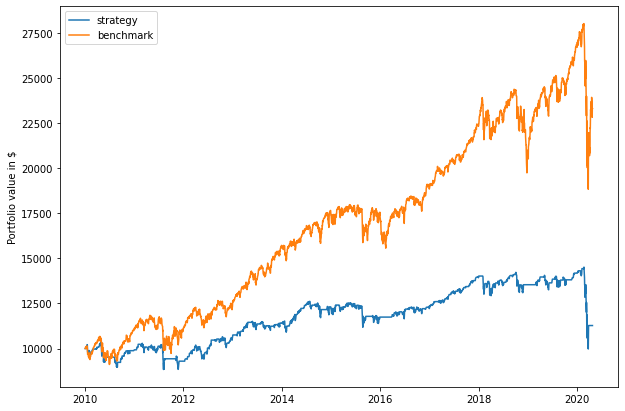

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

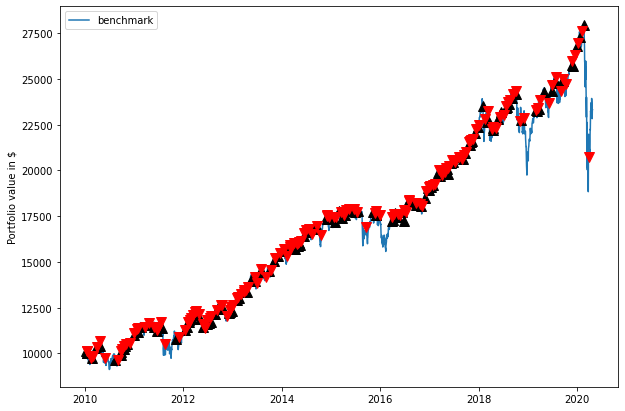

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,1.17,8.57
max_closed_out_drawdown,-31.30,-32.79
drawdown_annualized_return,-26.68,-3.83
drawdown_recovery,-0.09,-0.09
best_month,13.06,21.40
worst_month,-28.74,-29.90
sharpe_ratio,0.16,0.59
sortino_ratio,0.13,0.69
monthly_std,2.85,3.91


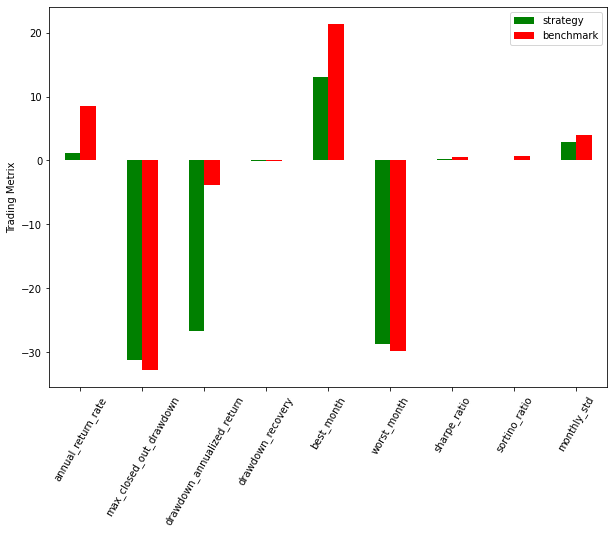

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df